In [1]:
import yt
from yt.analysis_modules.star_analysis.api import StarFormationRate

import numpy as np 
#import bottleneck as bn

from astropy.table import Table
import astropy.units as u

from consistency import *
from get_halo_center import get_halo_center
from get_proper_box_size import get_proper_box_size
from get_refine_box import get_refine_box

import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
import matplotlib as mpl
mpl.rcParams['font.family'] = 'stixgeneral'
mpl.rcParams['font.size'] = 16.
import matplotlib.pyplot as plt


%matplotlib notebook

/Users/molly/anaconda3/envs/astroconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/molly/anaconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: The star_analysis module has been deprecated. This code has been moved to the yt attic (https://github.com/yt-project/yt_attic) and will be removed in a future release.
  
/Users/molly/anaconda3/envs/astroconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/molly/anaconda3/envs/astroconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/molly/anaconda3/envs/astroconda/lib/python3.5/importlib/_bootstrap.py:222: Runtim

In [2]:
ref_color = 'darkorange' ###  '#4575b4' # purple
nat_color = '#4daf4a' # green



In [3]:
dsn = yt.load('/Users/molly/foggie/halo_008508/nref11n/natural/RD0018/RD0018')
dsr = yt.load('/Users/molly/foggie/halo_008508/nref11n/nref11n_nref10f_refine200kpc/RD0018/RD0018')


zsnap = dsr.current_redshift

track_name = "/Users/molly/foggie/halo_008508/nref11n/nref11n_nref10f_refine200kpc/halo_track"
#track_name = "/astro/simulations/FOGGIE/halo_008508/nref11n/nref11n_nref10f_refine200kpc/halo_track"
track = Table.read(track_name, format='ascii')
track.sort('col1')
proper_box_size = get_proper_box_size(dsr)
width = 15. #kpc

refine_box, refine_box_center, refine_width = get_refine_box(dsr, zsnap, track)

refine_box_natural, refine_box_center, refine_width = get_refine_box(dsn, zsnap, track)


yt : [INFO     ] 2018-12-02 07:52:17,801 Parameters: current_time              = 123.51334430542
yt : [INFO     ] 2018-12-02 07:52:17,802 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-12-02 07:52:17,804 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2018-12-02 07:52:17,805 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2018-12-02 07:52:17,807 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-12-02 07:52:17,807 Parameters: current_redshift          = 2.4999996211373
yt : [INFO     ] 2018-12-02 07:52:17,808 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2018-12-02 07:52:17,809 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2018-12-02 07:52:17,810 Parameters: hubble_constant           = 0.695
yt : [INFO     ] 2018-12-02 07:52:17,843 Parameters: current_time              = 123.51334430942
yt : [INFO     ] 2018-12-02 07:52:17,844 Parameters: domain_dimensions         = [256 

inside get_refine_box 2.4999996210603
using this loc:      col1       col2     col3     col4     col5     col6     col7   col8
------------- -------- -------- -------- -------- -------- -------- ----
2.49999996364 0.493631 0.489759 0.500463 0.495631 0.491759 0.502463   10
inside get_refine_box 2.4999996210603
using this loc:      col1       col2     col3     col4     col5     col6     col7   col8
------------- -------- -------- -------- -------- -------- -------- ----
2.49999996364 0.493631 0.489759 0.500463 0.495631 0.491759 0.502463   10


In [3]:
print(len(refine_box['temperature']),len(refine_box_natural['temperature']))
#len(np.array(refine_box['temperature']))

135919882 365470


In [4]:
mH = 1.6737236e-24 * u.g
total_forced_HI_mass = sum(mH * refine_box['H_p0_number_density'] * refine_box['cell_volume'].in_units('cm**3'))
print(total_forced_HI_mass)
total_natural_HI_mass = sum(mH * refine_box_natural['H_p0_number_density'] * refine_box_natural['cell_volume'].in_units('cm**3'))

6.822054289153701e+42 g


In [17]:
print('forced: ', total_forced_HI_mass.to('Msun'), 'natural: ', total_natural_HI_mass.to('Msun'))
print('forced: ', np.log10(total_forced_HI_mass.to('Msun').value), 'natural: ', np.log10(total_natural_HI_mass.to('Msun').value))
print('forced / natural: ', total_forced_HI_mass.to('Msun')/total_natural_HI_mass.to('Msun'))

hires_HI_mass = 3527266108.684818 * u.Msun
print("{:.3E}".format(hires_HI_mass))
print('hires / fored: ', hires_HI_mass.to('Msun')/total_forced_HI_mass.to('Msun'))

forced:  3430796396.340459 solMass natural:  2527727713.713029 solMass
forced:  9.53539494522913 natural:  9.402730290021438
forced / natural:  1.357265016215253
3.527E+09 solMass
hires / fored:  1.0281187517998038


In [6]:
import trident
trident.add_ion_fields(dsn, ions=['C IV', 'O VI', 'Si II',  'Si IV'])
trident.add_ion_fields(dsr, ions=['C IV', 'O VI', 'Si II',  'Si IV'])


total_forced_SiII_mass = sum(mH * refine_box['Si_p1_number_density'] * refine_box['cell_volume'].in_units('cm**3'))
total_natural_SiII_mass = sum(mH * refine_box_natural['Si_p1_number_density'] * refine_box_natural['cell_volume'].in_units('cm**3'))
total_forced_SiII_mass = total_forced_SiII_mass * 28.0855 
total_natural_SiII_mass = total_natural_SiII_mass  * 28.0855 
print('SiII forced: ', total_forced_SiII_mass.to('Msun'), 'natural: ', total_natural_SiII_mass.to('Msun'))

total_forced_OVI_mass = sum(mH * refine_box['O_p5_number_density'] * refine_box['cell_volume'].in_units('cm**3'))
total_natural_OVI_mass = sum(mH * refine_box_natural['O_p5_number_density'] * refine_box_natural['cell_volume'].in_units('cm**3'))
total_forced_OVI_mass = total_forced_OVI_mass * 15.999
total_natural_OVI_mass = total_natural_OVI_mass * 15.999
print('OVI forced: ', total_forced_OVI_mass.to('Msun'), 'natural: ', total_natural_OVI_mass.to('Msun'))

SiII forced:  3256571.903403307 solMass natural:  3445896.6773041002 solMass
OVI forced:  34160.70742971444 solMass natural:  47875.8142363978 solMass


In [7]:

total_forced_SiIV_mass = sum(mH * refine_box['Si_p3_number_density'] * refine_box['cell_volume'].in_units('cm**3'))
total_natural_SiIV_mass = sum(mH * refine_box_natural['Si_p3_number_density'] * refine_box_natural['cell_volume'].in_units('cm**3'))
total_forced_SiIV_mass = total_forced_SiIV_mass * 28.0855 
total_natural_SiV_mass = total_natural_SiIV_mass  * 28.0855 


In [8]:
print('SiIV forced: ', total_forced_SiIV_mass.to('Msun'), 'natural: ', total_natural_SiIV_mass.to('Msun'))

total_forced_CIV_mass = sum(mH * refine_box['C_p3_number_density'] * refine_box['cell_volume'].in_units('cm**3'))
total_natural_CIV_mass = sum(mH * refine_box_natural['C_p3_number_density'] * refine_box_natural['cell_volume'].in_units('cm**3'))
total_forced_CIV_mass = total_forced_CIV_mass * 12.0107
total_natural_CIV_mass = total_natural_CIV_mass * 12.0107
print('CIV forced: ', total_forced_CIV_mass.to('Msun'), 'natural: ', total_natural_CIV_mass.to('Msun'))


SiIV forced:  16277.456787668729 solMass natural:  1496.8863765446265 solMass
CIV forced:  26447.38265680099 solMass natural:  57701.3483655502 solMass


In [9]:

print('SiII : ', total_forced_SiII_mass.to('Msun')/ total_natural_SiII_mass.to('Msun'))
print('CIV : ', total_forced_CIV_mass.to('Msun')/ total_natural_CIV_mass.to('Msun'))
print('SiIV : ', total_forced_SiIV_mass.to('Msun')/total_natural_CIV_mass.to('Msun'))
print('OVI : ', total_forced_OVI_mass.to('Msun')/ total_natural_OVI_mass.to('Msun'))

SiII :  0.9450579075258543
CIV :  0.4583494737289543
SiIV :  0.28209837809244265
OVI :  0.713527445424492


In [10]:
total_forced_gas_mass = sum(refine_box['density'] * refine_box['cell_volume'].in_units('cm**3'))
total_natural_gas_mass = sum(refine_box_natural['density'] * refine_box_natural['cell_volume'].in_units('cm**3'))
print('gas : ', "{:.3f}".format(total_forced_gas_mass.to('Msun')/ total_natural_gas_mass.to('Msun')))

gas :  1.080


In [11]:
print('forced : ',total_forced_HI_mass.to('Msun') /  total_forced_gas_mass.to('Msun'))
print('natural :', total_natural_HI_mass.to('Msun')/ total_natural_gas_mass.to('Msun'))


forced :  0.29072730733263047 solMass
natural : 0.23129249752940598 solMass


In [12]:
print('all gas forced : ', "{:.3E}".format(total_forced_gas_mass.to('Msun').value), 'natural: ', "{:.3E}".format(total_natural_gas_mass.to('Msun').value))
print('HI forced: ', "{:.3E}".format(total_forced_HI_mass.to('Msun').value), 'natural: ', "{:.3E}".format(total_natural_HI_mass.to('Msun').value))
print('SiII forced: ', "{:.3E}".format(total_forced_SiII_mass.to('Msun').value), 'natural: ', "{:.3E}".format(total_natural_SiII_mass.to('Msun').value))
print('SiIV forced: ', "{:.3E}".format(total_forced_SiIV_mass.to('Msun').value), 'natural: ', "{:.3E}".format(total_natural_SiIV_mass.to('Msun').value))
print('CIV forced: ', "{:.3E}".format(total_forced_CIV_mass.to('Msun').value), 'natural: ', "{:.3E}".format(total_natural_CIV_mass.to('Msun').value))
print('OVI forced: ', "{:.3E}".format(total_forced_OVI_mass.to('Msun').value), 'natural: ', "{:.3E}".format(total_natural_OVI_mass.to('Msun').value))


all gas forced :  1.180E+10 natural:  1.093E+10
HI forced:  3.431E+09 natural:  2.528E+09
SiII forced:  3.257E+06 natural:  3.446E+06
SiIV forced:  1.628E+04 natural:  1.497E+03
CIV forced:  2.645E+04 natural:  5.770E+04
OVI forced:  3.416E+04 natural:  4.788E+04


In [13]:
print('gas : ', "{:.3f}".format(total_forced_gas_mass.to('Msun')/ total_natural_gas_mass.to('Msun')))
print('HI :', "{:.3f}".format(total_forced_HI_mass.to('Msun').value/total_natural_HI_mass.to('Msun').value))
print('SiII : ', "{:.3f}".format(total_forced_SiII_mass.to('Msun').value/total_natural_SiII_mass.to('Msun').value))
print('SiIV : ', "{:.3f}".format(total_forced_SiIV_mass.to('Msun').value/total_natural_SiIV_mass.to('Msun').value))
print('CIV : ', "{:.3f}".format(total_forced_CIV_mass.to('Msun').value/total_natural_CIV_mass.to('Msun').value))
print('OVI : ', "{:.3f}".format(total_forced_OVI_mass.to('Msun').value/total_natural_OVI_mass.to('Msun').value))


gas :  1.080
HI : 1.357
SiII :  0.945
SiIV :  10.874
CIV :  0.458
OVI :  0.714


In [57]:
smn = refine_box_natural['particle_mass']
ctn = refine_box_natural['creation_time']

smr = refine_box['particle_mass']
ctr = refine_box['creation_time']

starsn = (ctn > 0)
ctn = ctn[starsn]
smn = smn[starsn]

starsr = (ctr > 0)
ctr = ctr[starsr]
smr = smr[starsr]


In [59]:
total_star_mass_forced = sum(smr)
total_star_mass_natural = sum(smn)
print('stars natural: ', total_star_mass_natural, 'forced: ', total_star_mass_forced)


stars natural:  2.223805946326194e+43 g forced:  2.5640168644387504e+43 g


In [65]:
print('stars natural: ', "{:.3E}".format(total_star_mass_natural.to('Msun').value), 'forced: ', "{:.3E}".format(total_star_mass_forced.to('Msun').value))
print('stars : ', "{:.3f}".format(total_star_mass_forced/total_star_mass_natural))
print((total_star_mass_forced.to('Msun') + total_forced_gas_mass.to('Msun')) /( total_star_mass_natural.to('Msun') + total_natural_gas_mass.to('Msun')))

stars natural:  1.118E+10 forced:  1.289E+10
stars :  1.153
1.016300981974951 dimensionless


In [67]:
### z = 3
dsn = yt.load('/Users/molly/foggie/halo_008508/nref11n/natural/RD0016/RD0016')
dsr = yt.load('/Users/molly/foggie/halo_008508/nref11n/nref11n_nref10f_refine200kpc/RD0016/RD0016')


zsnap = dsr.current_redshift

track_name = "/Users/molly/foggie/halo_008508/nref11n/nref11n_nref10f_refine200kpc/halo_track"
#track_name = "/astro/simulations/FOGGIE/halo_008508/nref11n/nref11n_nref10f_refine200kpc/halo_track"
track = Table.read(track_name, format='ascii')
track.sort('col1')
proper_box_size = get_proper_box_size(dsr)
width = 15. #kpc

refine_box, refine_box_center, refine_width = get_refine_box(dsr, zsnap, track)
refine_width = refine_width * proper_box_size

# center is trying to be the center of the halo
centerr, velocity = get_halo_center(dsr, refine_box_center)
width_code = width / proper_box_size ## needs to be in code units
boxr = dsr.r[centerr[0] - 0.5*width_code : centerr[0] + 0.5*width_code, \
           centerr[1] - 0.5*width_code : centerr[1] + 0.5*width_code, \
           centerr[2] - 0.5*width_code : centerr[2] + 0.5*width_code]

refine_box_natural, refine_box_center, refine_width = get_refine_box(dsn, zsnap, track)
refine_width = refine_width * proper_box_size

# center is trying to be the center of the halo
centern, velocity = get_halo_center(dsn, refine_box_center)
width_code = width / proper_box_size ## needs to be in code units
boxn = dsn.r[centern[0] - 0.5*width_code : centern[0] + 0.5*width_code, \
           centern[1] - 0.5*width_code : centern[1] + 0.5*width_code, \
           centern[2] - 0.5*width_code : centern[2] + 0.5*width_code]



yt : [ERROR    ] 2018-09-25 13:40:19,024 None of the arguments provided to load() is a valid file
yt : [ERROR    ] 2018-09-25 13:40:19,026 Please check that you have used a correct path


YTOutputNotIdentified: Supplied ('/Users/molly/foggie/halo_008508/nref11n/natural/RD0016/RD0016',) {}, but could not load!

<IPython.core.display.Javascript object>


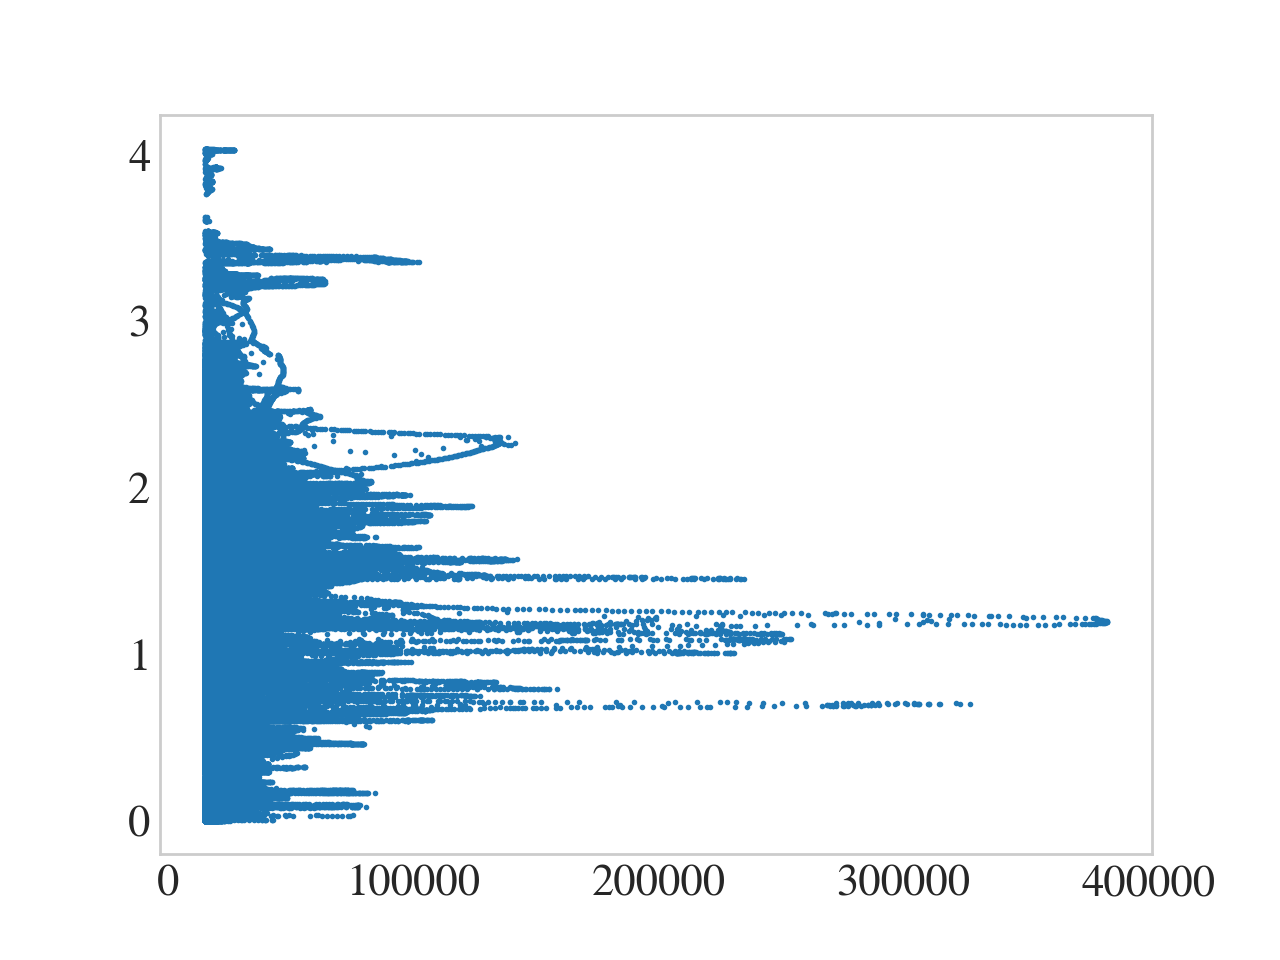

In [104]:
fig = plt.figure()
plt.scatter(nt['starmass'], nt['metal'], s=1)

In [68]:
dsnn = yt.load('/Users/molly/foggie/halo_008508/nref11n_selfshield_z15/natural/RD0018/RD0018')
dsnr = yt.load('/Users/molly/foggie/halo_008508/nref11n_selfshield_z15/nref11n_nref10f_selfshield_z6/RD0018/RD0018')


# zsnap = dsnr.current_redshift
zsnap = 2.49

track_name = "/Users/molly/foggie/halo_008508/nref11n_selfshield_z15/nref11n_nref10f_selfshield_z6/halo_track"
track = Table.read(track_name, format='ascii')
track.sort('col1')
proper_box_size = get_proper_box_size(dsnr)
width = 150. #kpc

refine_box, refine_box_centerr, refine_width = get_refine_box(dsnr, zsnap, track)
centernr, velocity = get_halo_center(dsnr, refine_box_centerr)

refine_box_natural, refine_box_centern, refine_width = get_refine_box(dsnn, zsnap, track)
centernn, velocity = get_halo_center(dsnn, refine_box_centern)


yt : [INFO     ] 2018-07-25 14:14:03,449 Parameters: current_time              = 123.513344305
yt : [INFO     ] 2018-07-25 14:14:03,450 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-07-25 14:14:03,452 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2018-07-25 14:14:03,454 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2018-07-25 14:14:03,456 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-07-25 14:14:03,457 Parameters: current_redshift          = 2.49999962114
yt : [INFO     ] 2018-07-25 14:14:03,459 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2018-07-25 14:14:03,460 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2018-07-25 14:14:03,461 Parameters: hubble_constant           = 0.695
yt : [INFO     ] 2018-07-25 14:14:03,495 Parameters: current_time              = 123.513344305
yt : [INFO     ] 2018-07-25 14:14:03,496 Parameters: domain_dimensions         = [256 256 25

('using this loc:', <Table length=1>
     col1       col2     col3     col4     col5     col6     col7    col8
   float64    float64  float64  float64  float64  float64  float64  int64
------------- -------- -------- -------- -------- -------- -------- -----
2.49999996364 0.493631 0.489759 0.500463 0.495631 0.491759 0.502463    10)


yt : [INFO     ] 2018-07-25 14:14:03,929 Gathering a field list (this may take a moment.)


We have located the main halo at : [0.49464893341064453, 0.4907369613647461, 0.5014715194702148]
('using this loc:', <Table length=1>
     col1       col2     col3     col4     col5     col6     col7    col8
   float64    float64  float64  float64  float64  float64  float64  int64
------------- -------- -------- -------- -------- -------- -------- -----
2.49999996364 0.493631 0.489759 0.500463 0.495631 0.491759 0.502463    10)


Parsing Hierarchy : 100%|██████████| 914/914 [00:00<00:00, 28394.05it/s]
yt : [INFO     ] 2018-07-25 14:14:51,979 Gathering a field list (this may take a moment.)


We have located the main halo at : [0.49464893341064453, 0.4907369613647461, 0.5014677047729492]


In [70]:
spnr = dsnr.sphere(centernr,(50.,'kpc'))
spnn = dsnn.sphere(centernn,(50.,'kpc'))

sfrnr = StarFormationRate(dsnr, data_source=spnr)
sfrnn = StarFormationRate(dsnn, data_source=spnn)


<IPython.core.display.Javascript object>


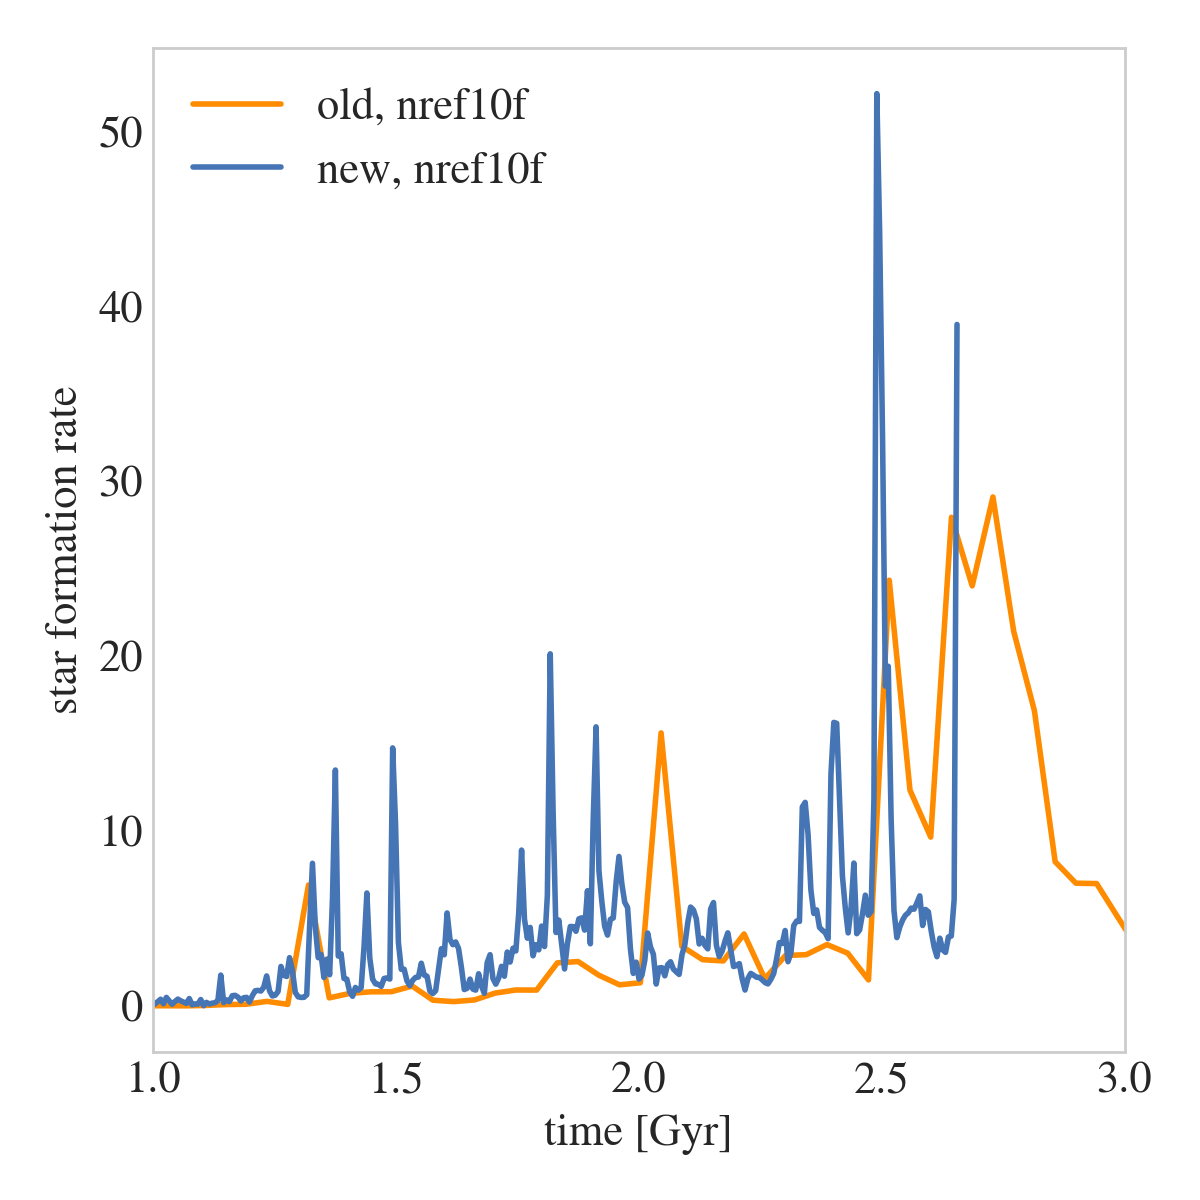

In [77]:
fig = plt.figure(figsize=(6,6))

plt.plot(sfrr.time.to('Gyr'),sfrr.Msol_yr, lw=2, color=ref_color, label="old, nref10f")
#plt.plot(sfrn.time.to('Gyr'),sfrn.Msol_yr, lw=2, color=nat_color, label="old, natural")

plt.plot(sfrnr.time.to('Gyr'),sfrnr.Msol_yr, lw=2, color='#4575b4', label="new, nref10f")
#plt.plot(sfrnn.time.to('Gyr'),sfrnn.Msol_yr, lw=2, color='#4575b4', label="new, natural")

plt.legend(loc='upper left')
plt.xlabel('time [Gyr]')
plt.ylabel('star formation rate')
plt.xlim(1,3)
plt.tight_layout()


<IPython.core.display.Javascript object>


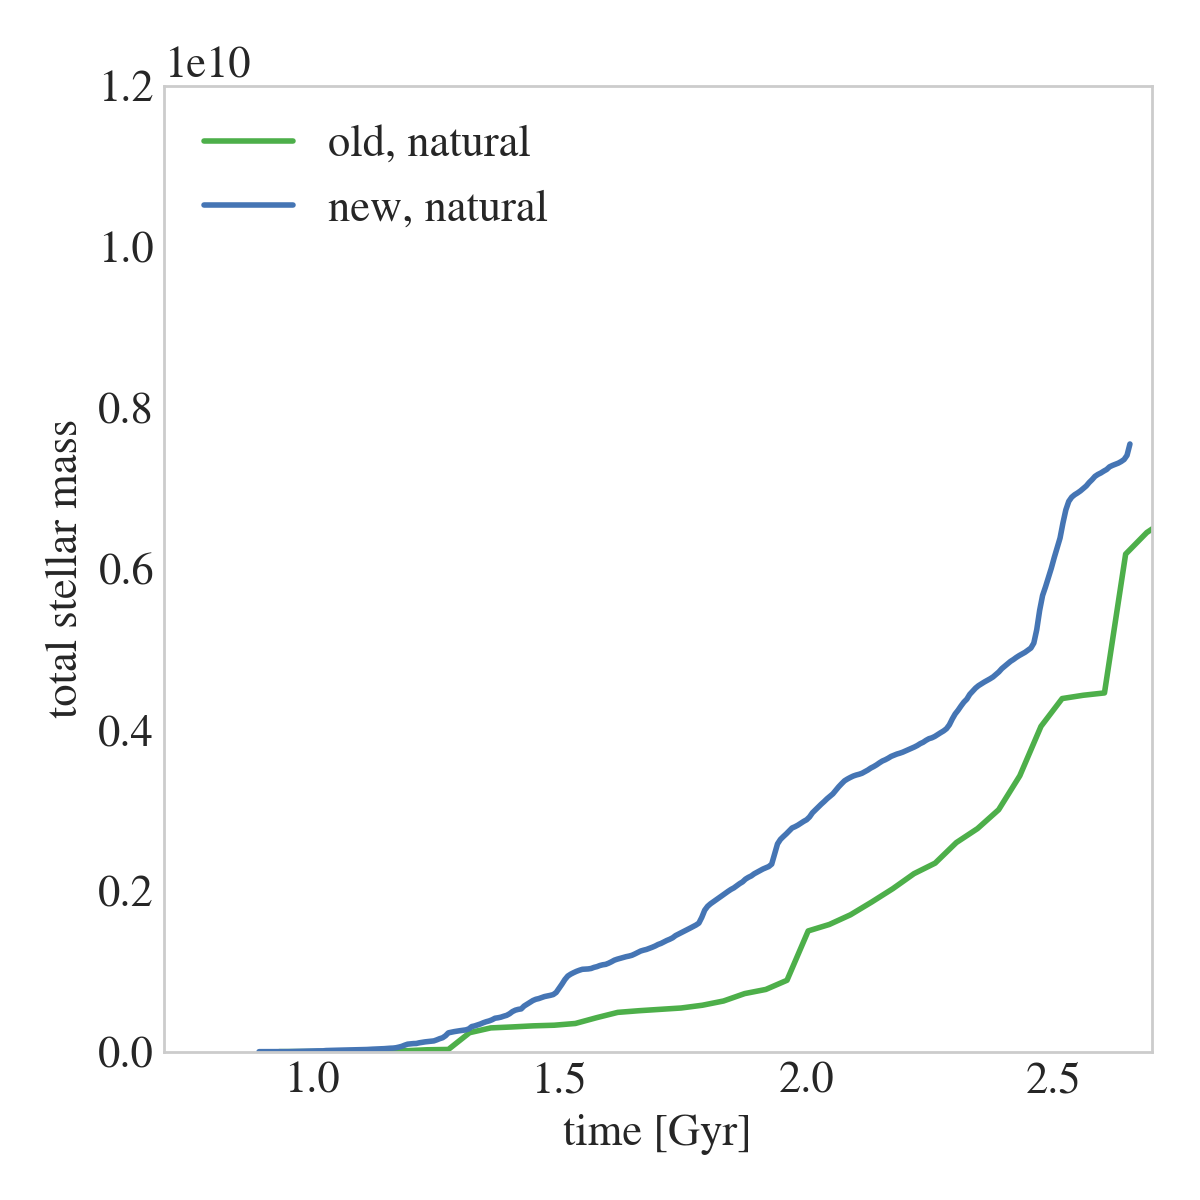

In [94]:
fig = plt.figure(figsize=(6,6))

#plt.plot(sfrr.time.to('Gyr'),sfrr.Msol_cumulative, lw=2, color=ref_color, label="old, nref10f")
plt.plot(sfrn.time.to('Gyr'),sfrn.Msol_cumulative, lw=2, color=nat_color, label="old, natural")

#plt.plot(sfrnr.time.to('Gyr'),sfrnr.Msol_cumulative, lw=2, color='#4575b4', label="new, nref10f")

plt.plot(sfrnn.time.to('Gyr'),sfrnn.Msol_cumulative, lw=2, color='#4575b4', label="new, natural")

plt.legend(loc='upper left')
plt.xlabel('time [Gyr]')
plt.ylabel('total stellar mass')
plt.xlim(0.7,2.7)
plt.ylim(0,1.2e10)
plt.tight_layout()


In [15]:
#/ (0.6e12 )
print(np.log10(max(sfrr.Msol_cumulative)) , np.log10(sum(nt['starmass'])))

10.593551743763303 10.426629732339286


In [97]:
### nref11f rd0018
#Located the main halo at: [0.49462985992431641, 0.49077510833740234, 0.50144290924072266] 
centerf= [0.49462985992431641, 0.49077510833740234, 0.50144290924072266] 
#[0.00203490936741 code_velocity, -0.00334983726038 code_velocity, 0.000646124346634 code_velocity]
dsf = yt.load('/Volumes/foggie/halo_008508/nref11n/nref11f_refine200kpc/RD0018/RD0018')

refine_box_hires, refine_box_center, refine_width = get_refine_box(dsf, zsnap, track)
refine_width = refine_width * proper_box_size


yt : [INFO     ] 2018-12-01 21:05:01,933 Parameters: current_time              = 123.51334430942
yt : [INFO     ] 2018-12-01 21:05:01,934 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-12-01 21:05:01,936 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2018-12-01 21:05:01,937 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2018-12-01 21:05:01,937 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-12-01 21:05:01,939 Parameters: current_redshift          = 2.4999996210603
yt : [INFO     ] 2018-12-01 21:05:01,939 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2018-12-01 21:05:01,940 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2018-12-01 21:05:01,941 Parameters: hubble_constant           = 0.695


inside get_refine_box 2.4999996210603
using this loc:      col1       col2     col3     col4     col5     col6     col7   col8
------------- -------- -------- -------- -------- -------- -------- ----
2.49999996364 0.493631 0.489759 0.500463 0.495631 0.491759 0.502463   10


In [45]:
smn = refine_box_natural['particle_mass']
ctn = refine_box_natural['creation_time']

smr = refine_box['particle_mass']
ctr = refine_box['creation_time']

smh = refine_box_hires['particle_mass']
cth = refine_box_hires['creation_time']

starsn = (ctn > 0)
ctn = ctn[starsn]
smn = smn[starsn]

starsr = (ctr > 0)
ctr = ctr[starsr]
smr = smr[starsr]

starsh = (cth > 0)
cth = cth[starsh]
smh = smh[starsh]

total_star_mass_hires = sum(smh)
total_star_mass_forced = sum(smr)
total_star_mass_natural = sum(smn)
print('stars natural: ', total_star_mass_natural, 'forced: ', total_star_mass_forced, 'hires: ', total_star_mass_hires)


Parsing Hierarchy : 100%|██████████| 5869/5869 [00:00<00:00, 17383.80it/s]
yt : [INFO     ] 2018-12-01 18:03:30,598 Gathering a field list (this may take a moment.)
/Users/molly/anaconda3/envs/astroconda/lib/python3.5/site-packages/yt/units/yt_array.py:978: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ret = super(YTArray, self).__getitem__(item)
/Users/molly/anaconda3/envs/astroconda/lib/python3.5/site-packages/yt/fields/fluid_fields.py:201: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_field[slice_3d] = f


stars natural:  1.338472339508308e+43 g forced:  9.877183042409149e+42 g hires:  9.966890964305116e+42 g


In [46]:
print('stars natural: ', "{:.3E}".format(total_star_mass_natural.to('Msun').value), \
      'forced: ', "{:.3E}".format(total_star_mass_forced.to('Msun').value),\
      'hires: ', "{:.3E}".format(total_star_mass_hires.to('Msun').value))
print('stars : ', "{:.6f}".format(total_star_mass_hires/total_star_mass_forced))

stars natural:  6.731E+09 forced:  4.967E+09 hires:  5.012E+09
stars :  1.009082


In [38]:
total_hires_gas_mass = sum(refine_box_hires['cell_mass'])
print('hires gas = ', total_hires_gas_mass.to('Msun'))
#total_forced_gas_mass = sum(refine_box['density'] * refine_box['cell_volume'].in_units('cm**3'))
#total_natural_gas_mass = sum(refine_box_natural['density'] * refine_box_natural['cell_volume'].in_units('cm**3'))
print('gas : ', "{:.3f}".format(total_hires_gas_mass.to('Msun')/ total_forced_gas_mass.to('Msun')))

KeyboardInterrupt: 

In [47]:
total_hires_gas_mass = refine_box_hires.quantities.total_quantity(["cell_mass"])
total_forced_gas_mass_new = refine_box.quantities.total_quantity(["cell_mass"])
total_natural_gas_mass_new = refine_box_natural.quantities.total_quantity(["cell_mass"])
print('all gas forced : ', "{:.3E}".format(total_forced_gas_mass_new.to('Msun').value),\
      'hires : ', "{:.3E}".format(total_hires_gas_mass.to('Msun').value),\
      'natural: ', "{:.3E}".format(total_natural_gas_mass_new.to('Msun').value))

print('gas : ', "{:.3f}".format(total_hires_gas_mass.to('Msun')/ total_forced_gas_mass.to('Msun')))

all gas forced :  1.180E+10 hires :  1.207E+10 natural:  1.093E+10
gas :  1.023


In [98]:
trident.add_ion_fields(dsf, ions=['C IV', 'O VI', 'Si II',  'Si IV'])


Parsing Hierarchy : 100%|██████████| 5869/5869 [00:01<00:00, 4015.33it/s] 
yt : [INFO     ] 2018-12-01 21:05:14,095 Gathering a field list (this may take a moment.)
/Users/molly/anaconda3/envs/astroconda/lib/python3.5/site-packages/yt/units/yt_array.py:978: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ret = super(YTArray, self).__getitem__(item)
/Users/molly/anaconda3/envs/astroconda/lib/python3.5/site-packages/yt/fields/fluid_fields.py:201: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_field[slice_3d] = f


In [62]:
# Function defining the derived field
def ovi_mass(field, data):
    moxy = yt.YTArray(15.999*mH.value,"g") 
    return moxy * data['O_p5_number_density']*data['cell_volume'] 

#Add the field to the dataset, linking to the derived field function and
# units of the field
dsn.add_field(("gas", "ovi_mass"), units="g", function=ovi_mass, force_override=True)



/Users/molly/anaconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:8: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  


GenerationInProgress: 

In [67]:
total_natural_ovi_mass_new = refine_box_natural.quantities.total_quantity(["ovi_mass"])
total_natural_OVI_mass = sum(mH * refine_box_natural['O_p5_number_density'] * refine_box_natural['cell_volume'].in_units('cm**3'))
total_natural_OVI_mass = total_natural_OVI_mass * 15.999
print(total_natural_ovi_mass_new, total_natural_OVI_mass)

9.333778546195297e+34 g 9.333778546195328e+34 g


In [71]:
dsf.add_field(("gas", "ovi_mass"), units="g", function=ovi_mass, force_override=True)
total_hires_OVI_mass = refine_box_hires.quantities.total_quantity(["ovi_mass"])

/Users/molly/anaconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  """Entry point for launching an IPython kernel.


In [77]:
print("{:.3E}".format(total_hires_OVI_mass.to('Msun').value))
print('OVI forced: ', "{:.3E}".format(total_forced_OVI_mass.to('Msun').value), 'natural: ', "{:.3E}".format(total_natural_OVI_mass.to('Msun').value))
print("{:.3f}".format(total_hires_OVI_mass/total_forced_OVI_mass))

2.674E+04
OVI forced:  3.416E+04 natural:  4.694E+01
0.783


In [83]:
def civ_mass(field, data):
    mcarb = yt.YTArray(12.0107*mH.value,"g") 
    return mcarb * data['C_p3_number_density']*data['cell_volume'] 

#Add the field to the dataset, linking to the derived field function and
# units of the field
dsf.add_field(("gas", "civ_mass"), units="g", function=civ_mass, force_override=True)
total_hires_CIV_mass = refine_box_hires.quantities.total_quantity(["civ_mass"])


/Users/molly/anaconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:7: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  import sys


In [84]:
print("{:.3E}".format(total_hires_CIV_mass.to('Msun').value))
print('CIV forced: ', "{:.3E}".format(total_forced_CIV_mass.to('Msun').value), 'natural: ', "{:.3E}".format(total_natural_CIV_mass.to('Msun').value))
print("{:.3f}".format(total_hires_CIV_mass/total_forced_CIV_mass))

2.785E+04
CIV forced:  2.645E+04 natural:  5.770E+04
1.053


In [91]:
def siiv_mass(field, data):
    msil = yt.YTArray(28.0855*mH.value,"g") 
    return msil * data['Si_p3_number_density']*data['cell_volume'] 

#Add the field to the dataset, linking to the derived field function and
# units of the field
dsf.add_field(("gas", "siiv_mass"), units="g", function=siiv_mass, force_override=True)
total_hires_SiIV_mass = refine_box_hires.quantities.total_quantity(["siiv_mass"])

dsr.add_field(("gas", "siiv_mass"), units="g", function=siiv_mass, force_override=True)
total_forced_SiIV_mass_new = refine_box.quantities.total_quantity(["siiv_mass"])
print('SiIV forced old: ', "{:.3E}".format(total_forced_SiIV_mass.to('Msun').value), 'new: ', "{:.3E}".format(total_forced_SiIV_mass_new.to('Msun').value))


print('SiIV hires: ',"{:.3E}".format(total_hires_SiIV_mass.to('Msun').value))
print('SiIV forced: ', "{:.3E}".format(total_forced_SiIV_mass.to('Msun').value), 'natural: ', "{:.3E}".format(total_natural_SiIV_mass.to('Msun').value))
print("{:.3f}".format(total_hires_SiIV_mass/total_forced_SiIV_mass))

/Users/molly/anaconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:7: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  import sys
/Users/molly/anaconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:10: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  # Remove the CWD from sys.path while we load stuff.


SiIV forced old:  1.628E+04 new:  1.628E+04
SiIV hires:  8.962E-01
SiIV forced:  1.628E+04 natural:  1.497E+03
0.000


In [87]:
def siii_mass(field, data):
    msil = yt.YTArray(28.0855*mH.value,"g") 
    return msil * data['Si_p1_number_density']*data['cell_volume'] 

#Add the field to the dataset, linking to the derived field function and
# units of the field
dsf.add_field(("gas", "siii_mass"), units="g", function=siii_mass, force_override=True)
total_hires_SiII_mass = refine_box_hires.quantities.total_quantity(["siii_mass"])


print('SiII hires: ',"{:.3E}".format(total_hires_SiII_mass.to('Msun').value))
print('SiII forced: ', "{:.3E}".format(total_forced_SiII_mass.to('Msun').value), 'natural: ', "{:.3E}".format(total_natural_SiII_mass.to('Msun').value))
print("{:.3f}".format(total_hires_SiII_mass/total_forced_SiII_mass))

/Users/molly/anaconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:7: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  import sys


3.108E-02
SiII forced:  3.257E+06 natural:  3.446E+06
0.000


In [6]:
total_hires_SiII_mass = 3227906.495237263 *u.Msun
print('SiII hires: ',"{:.3E}".format(total_hires_SiII_mass.to('Msun').value))
print('SiII ratio = ',"{:.3f}".format(total_hires_SiII_mass/3256571.903403307))

SiII hires:  3.228E+06
SiII ratio =  0.991 solMass


In [8]:
total_hires_SiIV_mass = 19732.613408621106*u.Msun
print('SiIV hires: ',"{:.3E}".format(total_hires_SiIV_mass.to('Msun').value))
print('SiIV ratio = ',"{:.3f}".format(total_hires_SiIV_mass/16277.456787668729))

SiIV hires:  1.973E+04
SiIV ratio =  1.212 solMass


In [ ]:
def siii_mass(field, data):
    msil = yt.YTArray(28.0855*mH.value,"g") 
    return msil * data['Si_p1_number_density']*data['cell_volume'] 

def siiv_mass(field, data):
    msil = yt.YTArray(28.0855*mH.value,"g") 
    return msil * data['Si_p3_number_density']*data['cell_volume'] 

def civ_mass(field, data):
    mcarb = yt.YTArray(12.0107*mH.value,"g") 
    return mcarb * data['C_p3_number_density']*data['cell_volume'] 

def ovi_mass(field, data):
    moxy = yt.YTArray(15.999*mH.value,"g") 
    return moxy * data['O_p5_number_density']*data['cell_volume'] 


dsf.add_field(("gas", "siii_mass"), units="g", function=siii_mass, force_override=True)
dsf.add_field(("gas", "siiv_mass"), units="g", function=siiv_mass, force_override=True)
dsf.add_field(("gas", "civ_mass"), units="g", function=civ_mass, force_override=True)
dsf.add_field(("gas", "ovi_mass"), units="g", function=ovi_mass, force_override=True)


In [ ]:
total_hires_SiII_mass = refine_box_hires[('gas','siii_mass')].sum().to('Msun')


In [ ]:
total_hires_SiIV_mass = refine_box_hires[('gas','siiv_mass')].sum().to('Msun')


In [ ]:
total_hires_CIV_mass = refine_box_hires[('gas','civ_mass')].sum().to('Msun')


In [ ]:
total_hires_OVI_mass = refine_box_hires[('gas','ovi_mass')].sum().to('Msun')
